# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [81]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [66]:
data.get('feature_names')

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [45]:
k_means = KMeans(random_state=0)
k_means.fit(X)

KMeans(random_state=0)

In [46]:
silhouette_score(X, labels=k_means.labels_)

0.5486213604076143

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [25]:
k_means_5 = KMeans(n_clusters=5,
                 random_state=0)
k_means_5.fit(X)

KMeans(n_clusters=5, random_state=0)

In [26]:
silhouette_score(X, labels=k_means_5.labels_)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [27]:
k_means_3 = KMeans(n_clusters=3,
                 random_state=0)
k_means_3.fit(X)

KMeans(n_clusters=3, random_state=0)

In [28]:
silhouette_score(X, labels=k_means_3.labels_)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [30]:
from yellowbrick.cluster import KElbowVisualizer

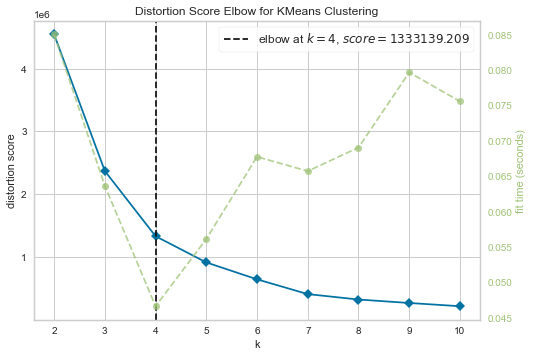

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
# By default distortion

visualizer = KElbowVisualizer(k_means)
visualizer.fit(X)
visualizer.show()

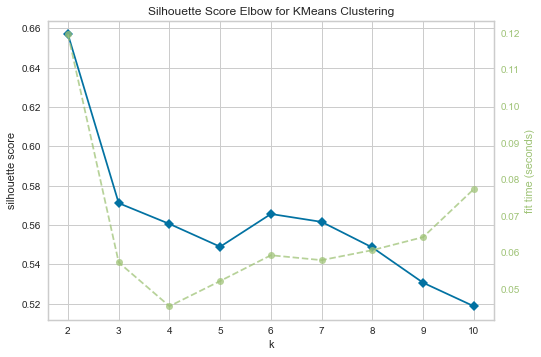

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [41]:
# Silhouette

visualizer = KElbowVisualizer(k_means, metric='silhouette', locate_elbow=False)
visualizer.fit(X)
visualizer.show()

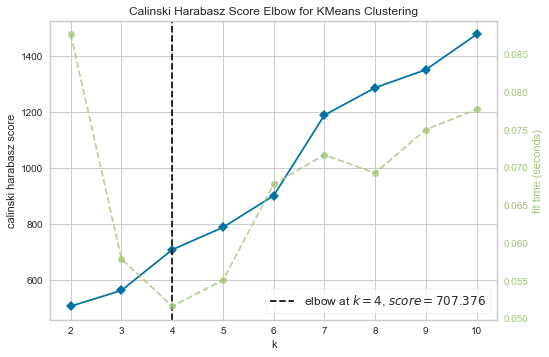

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [44]:
# Calinski Harabaz:

visualizer = KElbowVisualizer(k_means, metric='calinski_harabasz')
visualizer.fit(X)
visualizer.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
model = AgglomerativeClustering()
model = model.fit(X)

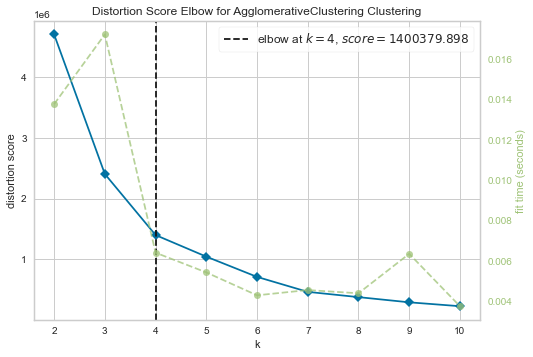

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
# By default distortion

visualizer = KElbowVisualizer(model)
visualizer.fit(X)
visualizer.show()

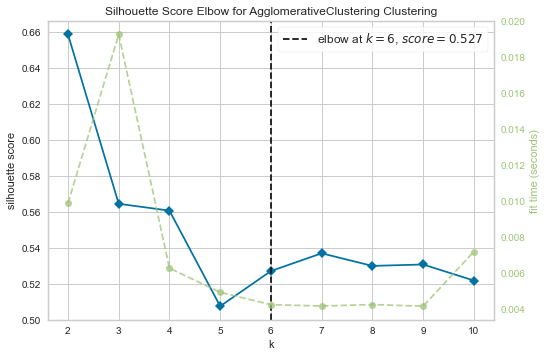

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [52]:
# Silhouette

visualizer = KElbowVisualizer(model, metric='silhouette')
visualizer.fit(X)
visualizer.show()

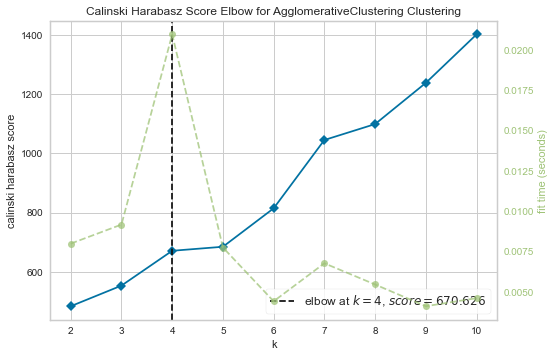

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [53]:
# Calinski Harabaz:

visualizer = KElbowVisualizer(model, metric='calinski_harabasz')
visualizer.fit(X)
visualizer.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [141]:
k_means_4 = KMeans(n_clusters=4,
                 random_state=0)
k_means_4.fit(X)

KMeans(n_clusters=4, random_state=0)

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [57]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [75]:
pca_pipeline = make_pipeline(StandardScaler(), 
                             PCA(2))
pca_pipeline.fit(X)
transformed_X = pca_pipeline.transform(X)

In [83]:
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])

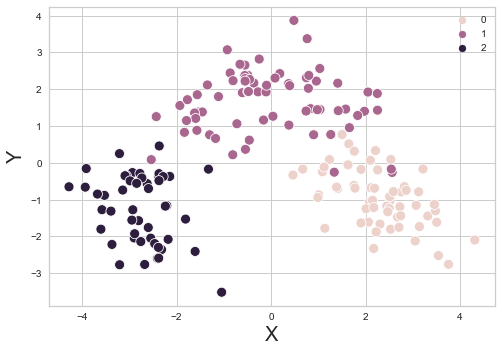

In [84]:
sns.scatterplot(x='PC1', y='PC2', data=data, hue=y, s= 100)
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [109]:
from sklearn.manifold import TSNE

In [117]:
tsne = TSNE(n_components=2, perplexity=30)
transformed_X = tsne.fit_transform(X)

In [118]:
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])

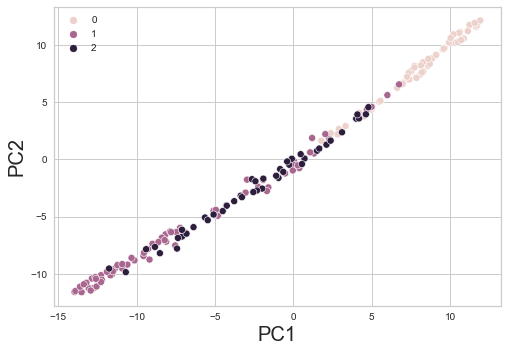

In [122]:
sns.scatterplot(x='PC1', y='PC2', data=data, hue=y, s= 50)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()

In [123]:
tsne = TSNE(n_components=2, perplexity=5)
transformed_X = tsne.fit_transform(X)

In [124]:
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])

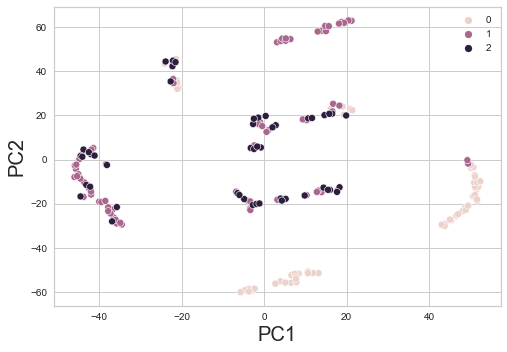

In [125]:
sns.scatterplot(x='PC1', y='PC2', data=data, hue=y, s= 50)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()

In [126]:
tsne = TSNE(n_components=2, perplexity=50)
transformed_X = tsne.fit_transform(X)

In [127]:
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])

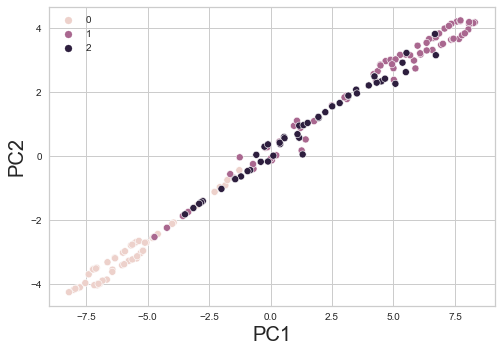

In [128]:
sns.scatterplot(x='PC1', y='PC2', data=data, hue=y, s= 50)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()